<a href="https://colab.research.google.com/github/souzajvp/data_science_bootcamp/blob/main/Jo%C3%A3o_V%C3%ADtor_Souza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resumo:

Meu objetivo é avaliar os casos de covid-19 e compará-los com outras doenças respiratórias importantes, como a Tuberculose e as Gripes (causads por diversos virus)

# Análise dos dados:


Importando módulos

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
%matplotlib inline


## Análise dos dados de Covid-19

Decidi fazer o upload do arquivo 'casos.csv.gz' no meu [github](https://github.com/souzajvp/data_science_bootcamp) para facilitar a importação e automatizar o processo para futuros leitores.

In [202]:
url = 'https://github.com/souzajvp/data_science_bootcamp/blob/main/modulo_01/caso.csv.gz?raw=true'
dados = pd.read_csv(url, compression='gzip')

In [203]:
dados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,NaN,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,NaN,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,NaN,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


## Valores nulos

In [204]:
dados.isnull().sum(axis=0)

date                                  0
state                                 0
city                               6383
place_type                            0
confirmed                             0
deaths                                0
order_for_place                       0
is_last                               0
estimated_population_2019          3672
estimated_population               3672
city_ibge_code                     3672
confirmed_per_100k_inhabitants    16999
death_rate                            0
dtype: int64

Notamo que as colunas que tem valores `NaN` são:
 - city;
 - estimated_population_2019;
 - estimated_population;
 - city_ibge_code;
 - confirmed_per_100k_inhabitants.

Certo, mas e quanto aos tipos de dados em cada coluna?

In [205]:
dados.dtypes

date                               object
state                              object
city                               object
place_type                         object
confirmed                           int64
deaths                              int64
order_for_place                     int64
is_last                              bool
estimated_population_2019         float64
estimated_population              float64
city_ibge_code                    float64
confirmed_per_100k_inhabitants    float64
death_rate                        float64
dtype: object

Notamos como os números faltantes de `estimated_population_2019`, `estimated_population` e `city_ibge_code` são os mesmos

In [206]:
dados.query('city_ibge_code == "NaN"').city.value_counts()

Importados/Indefinidos    3672
Name: city, dtype: int64

Pelo visto, estes 3672 dados faltantes na verdade são de casos classificados como origem "Importados/Indefinidos". <br> Talvez eu possa preencher esses dados como 0 para discernir de outros dados faltantes.

#### Mas e quanto aos dados faltantes na coluna `city`?

In [207]:
city_null_pop = dados[dados['city'].isnull() == True]['estimated_population'].unique()

In [208]:
print(len(city_null_pop))
print(city_null_pop)

27
[  861773.   894470.  4207714.  3055149.  3351543.  9187103.  4064052.
 14930634.  2809394.  7114598.  7113540.  3526220.  8690745.  4039277.
  9616621. 21292666.  3281480.  1796460. 17366189.  3534165. 11516840.
   631181.  2318822.  7252502. 11422973.  1590248. 46289333.]


Aparentemente, as linhas que contém dados nulos para cidade são linhas contendo atualizações de cada estado


Vamos separar os dados de acordo com estado e verificar a diferença entre eles.

In [209]:
dados_SP = dados.query("state == 'SP' & place_type == 'state'")
dados_PR = dados.query("state == 'PR' & place_type == 'state'")

In [210]:
print(dados_PR.shape, dados_SP.shape)

(239, 13) (253, 13)


In [211]:
print(len(dados_PR.city.unique()))
print(len(dados_SP.city.unique()))

1
1


Notamos como há diferenças entre o `shape` dos dois datasets, possivelmente pelo número de cidades coletada em cada estado

## Avaliando o Paraná

In [212]:
dados_PR
dados_PR_rv = dados_PR.iloc[::-1]
dados_PR_rv.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
592965,2020-03-12,PR,NaN,state,6,0,1,False,11433957.0,11516840.0,41.0,0.05210,0.0
592964,2020-03-13,PR,NaN,state,6,0,2,False,11433957.0,11516840.0,41.0,0.05210,0.0
592963,2020-03-16,PR,NaN,state,6,0,3,False,11433957.0,11516840.0,41.0,0.05210,0.0
592962,2020-03-17,PR,NaN,state,12,0,4,False,11433957.0,11516840.0,41.0,0.10420,0.0
592961,2020-03-18,PR,NaN,state,14,0,5,False,11433957.0,11516840.0,41.0,0.12156,0.0


In [213]:
dados_PR_rv.isnull().sum()

date                                0
state                               0
city                              239
place_type                          0
confirmed                           0
deaths                              0
order_for_place                     0
is_last                             0
estimated_population_2019           0
estimated_population                0
city_ibge_code                      0
confirmed_per_100k_inhabitants      0
death_rate                          0
dtype: int64

In [214]:
dados_PR_rv = dados_PR_rv.set_index('date')

#### Criando novas colunas:
1. Novos casos - utilizando a função `diff()`
2. Média móvel dos últimos 7 dias - utilizando a função `.rolling(window=7).mean()`


In [215]:
dados_PR_rv['new_cases'] = dados_PR_rv['confirmed'].diff()

In [216]:
dados_PR_rv

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate,new_cases
date,,,,,,,,,,,,,
2020-03-12,PR,NaN,state,6,0,1,False,11433957.0,11516840.0,41.0,0.05210,0.0000,NaN
2020-03-13,PR,NaN,state,6,0,2,False,11433957.0,11516840.0,41.0,0.05210,0.0000,0.0
2020-03-16,PR,NaN,state,6,0,3,False,11433957.0,11516840.0,41.0,0.05210,0.0000,0.0
2020-03-17,PR,NaN,state,12,0,4,False,11433957.0,11516840.0,41.0,0.10420,0.0000,6.0
2020-03-18,PR,NaN,state,14,0,5,False,11433957.0,11516840.0,41.0,0.12156,0.0000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,PR,NaN,state,215234,5258,235,False,11433957.0,11516840.0,41.0,1868.86333,0.0244,784.0
2020-11-04,PR,NaN,state,216266,5269,236,False,11433957.0,11516840.0,41.0,1877.82413,0.0244,1032.0
2020-11-05,PR,NaN,state,217175,5293,237,False,11433957.0,11516840.0,41.0,1885.71692,0.0244,909.0


In [217]:
dados_PR_rv['media_movel'] = dados_PR_rv.iloc[:,-1].rolling(window=7).mean()

In [218]:
# Como localizar as datas para ajustar as marcações.
dados_PR_rv.index.tolist().index('2020-06-17')
# Decretos
decretos = [dados_PR_rv.index.tolist().index('2020-03-23'), dados_PR_rv.index.tolist().index('2020-04-28'), dados_PR_rv.index.tolist().index('2020-06-17')]

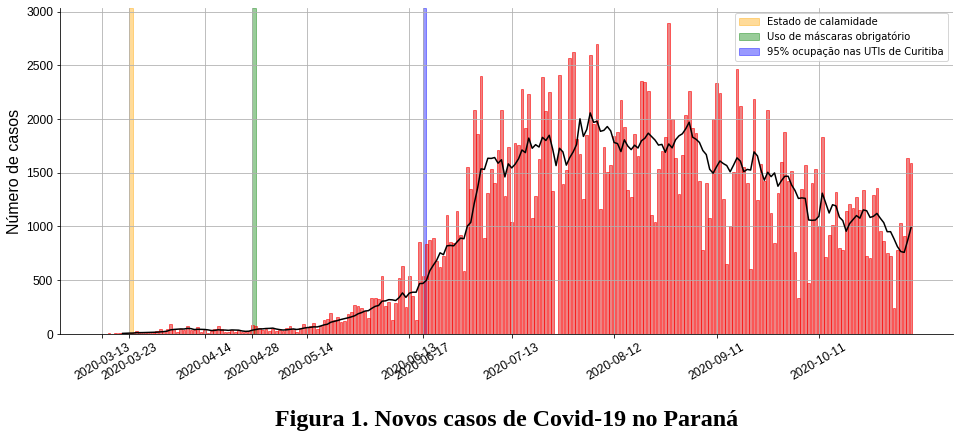

In [219]:
plt.figure(figsize=(16,6))
ax = sns.barplot(x=dados_PR_rv.index, y=dados_PR_rv['new_cases'], color='red', alpha=0.55, edgecolor='red')
sns.lineplot(x=dados_PR_rv.index, y= dados_PR_rv.media_movel, color = 'black', markers=True, alpha=1)
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 1. Novos casos de Covid-19 no Paraná', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(dados_PR_rv.index), 30)]
for i in decretos:
  pos.append(i)
  
l = []
for i in pos:
  l.append(dados_PR_rv.index[i])

plt.grid()
ax.set(xticks=pos, xticklabels=l);


plt.axvspan(9,10, zorder=0, alpha=0.4, color='orange', label='Estado de calamidade')
plt.axvspan(45, 46, zorder=0, alpha=0.4, color='green', label='Uso de máscaras obrigatório')
plt.axvspan(95, 96, zorder=0, alpha=0.4, color='blue', label='95% ocupação nas UTIs de Curitiba')

plt.legend();

Barras vermelhas indicam o número diário de novos casos no PR. A linha preta representa a média móvel (7 dias) de novos casos. Destacados em amarelo, verde e azul temos o decreto de calamidade pública (23/03), decreto que torna obrigatório o uso de máscaras (28/04) e o ponto (17/06) em que o índice de ocupação das UTIs de Curitiba chegou a 95%.

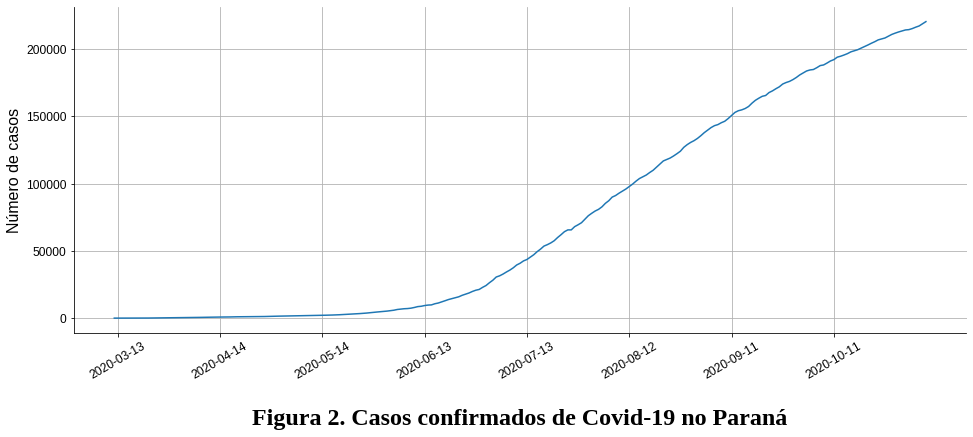

In [220]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(x=dados_PR_rv.index, y=dados_PR_rv['confirmed']);
sns.despine()

plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 2. Casos confirmados de Covid-19 no Paraná', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('')

# Criando xticks separados por 30:
pos = [i for i in range(1, len(dados_PR_rv.index), 30)]
  
l = []
for i in pos:
  l.append(dados_PR_rv.index[i])

plt.grid()
ax.set(xticks=pos, xticklabels=l);




## TODO Crescimento sem medidas de segurança


# Existe chance de segunda onda de Covid-19?

Assim como visto nos gráficos acima, o número de novos casos diários de covid-19 reduziu bastante desde o pico da pandemia no país. Mesmo assim, continuamos registrando muitas mortes diárias e, infelizmente estima-se que o número de casos real seja pelo menos de 5 a 8x maior que o reportado. [Link_noticia](www.github.com) <br>
Apesar dessa questão não ser nada trivial, temos algumas evidências preocupantes sobre o futuro da pandemia. A Europa está passando por semanas de aumento consecutivo nos casos de covid-19, até mesmo batendo recordes estabelecidos no começo do ano. Sendo assim, vários países já estabaleceram "lockdowns" parciais ou completos em regiões mais afetadas.<br>
Considerando o encaminhamento para o inverno no hemisfério norte, a relação entre sazonalidade e a covid vai ficando mais clara.
Desta forma, decidi avaliar também dados de Síndrome Respiratória Aguda Grave relatados em anos anteriores à pandemia.


## País

In [221]:
url = 'https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_01/gripe_pais.csv'
gripe_pais = pd.read_csv(url)

In [222]:
gripe_pais = gripe_pais.drop(['Situação do dado', 'Tipo', 'escala', 'data de publicação', 'sexo', 'UF', 'Unidade da Federação' ], axis=1)

Separando dados <br>

In [223]:
gripe_pais.dado.unique()


array(['srag', 'sragflu', 'obitoflu', 'sragcovid', 'obitocovid', 'obito'],
      dtype=object)

Notamos como existem diversas classificações para nossos dados... vou focar nas formas mais gerais:
1. srag;
2. obito.

In [224]:
gripe_pais_srag = gripe_pais.query("dado == 'srag'")
gripe_pais_obito = gripe_pais.query("dado == 'obito'")

In [225]:
gripe_pais_srag['Ano epidemiológico'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020])

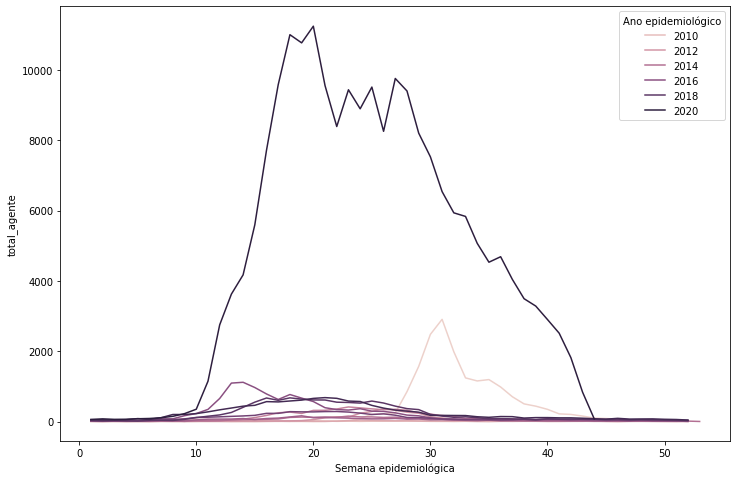

In [226]:
plt.figure(figsize=(12,8))
sns.lineplot(data=gripe_pais_srag, x='Semana epidemiológica', y='total_agente', hue='Ano epidemiológico');

Fazendo esse plot simples acima, vemos como o ano de 2020 tem uma quantidade de srag muito desproporcional. Aqui temos algumas hipóteses:
1. A pandemia causou muitas internações (SRAG), tendo muito mais casos de covid-19 do que das outras viroses que também causam srag;*
2. Antes de 2020, os casos de srag não eram monitorados com tanto afinco, e muitas vezes passavam despercebidos;

***Obs**: vários vírus podem causar SRAG, porém o SARS-CoV-2 aparenta ter um equilíbrio entre letalidade e transmissibilidade ideias para ter causado este impacto mundial. Como comparação, o vírus influenza da gripe comum se transmite para muito mais pessoas, porém com uma letalidade pelo menos 20 vezes menor do que o estiputado para covid-19.

Vamos eliminar 2020 para ter uma comparação mais justa

In [227]:
gripe_pais_srag = gripe_pais_srag.query('`Ano epidemiológico` != "2020"')

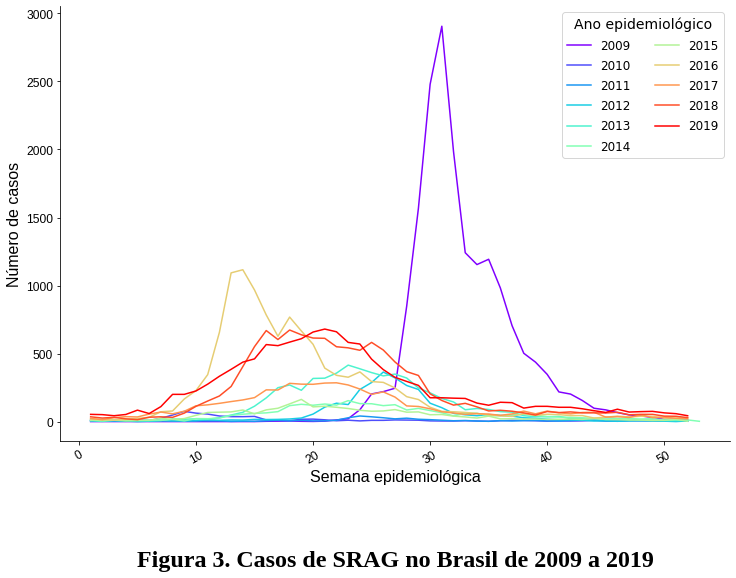

In [228]:
plt.figure(figsize=(12,8))
ax = sns.lineplot(data=gripe_pais_srag, x='Semana epidemiológica', y='total_agente', hue='Ano epidemiológico', palette='rainbow')
plt.yticks(fontsize=12, fontname="Liberation Sans")
plt.xticks(fontsize=12, rotation=30, fontname="Liberation Sans")
plt.title('Figura 3. Casos de SRAG no Brasil de 2009 a 2019', fontsize=24, weight="bold", fontname="Liberation Serif",  y=-0.3)
plt.ylabel('Número de casos', fontsize=16, fontname="Liberation Sans")
plt.xlabel('Semana epidemiológica', fontsize=16, fontname="Liberation Sans")
sns.despine()
ax.legend([*gripe_pais_srag['Ano epidemiológico'].unique()], fontsize=12, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14, ncol=2)
# plt.legend(fontsize=12, columnspacing=0.6, labelspacing=0.6, title='Ano epidemiológico', title_fontsize=14)
plt.show()

Após remover 2020, vemos como o gráfico fica mais homogêneo. Ainda assim, o ano de 2009 se destaca bastante. É importante lembrar que 2009 foi o ano em que a epidemia de gripe suína (causada pelo vírus Influenza A - H1N1) aconteceu. Apesar de a gripe suína não ser necessariamente mais letal, um problema enfrentado era que a população como um geral estava mais suscetível ao vírus e as vacinas anuais não forneciam proteção contra essa cepa viral. <br>
Outro ponto que chama a atenção é a diferença na sazonalidade dos casos de SRAG em 2009 vs dos outros anos. Uma possibilidade seria o tempo que a epidemia levou para chegar, se instalar e ser detectada no Brasil. Provavelmente, se avaliássemos os casos no México (país onde se rastreou o começo da epidemia), a sazonalidade de 2009 poderia ser mais semelhante.

In [229]:
gripe_pais.query('`Ano epidemiológico` == "2009"')
# gripe_pais.query('`Ano epidemiológico` == "2009"').plot(x='Semana epidemiológica', y='total_agente')

,dado,Ano epidemiológico,Semana epidemiológica,Ano e semana epidemiológica,Casos semanais reportados até a última atualização,Idade desconhecida,< 2 anos,0-4 anos,10-19 anos,2-4 anos,20-29 anos,30-39 anos,40-49 anos,5-9 anos,50-59 anos,60+ anos,Testes positivos,Testes negativos,Casos aguardando resultado,Casos sem informação laboratorial,Casos sem teste laboratorial,Resultado inconclusivo,SARS-CoV-2,Influenza,Outros,total_agente
0,srag,2009,1,2009W01,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,srag,2009,2,2009W02,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,srag,2009,3,2009W03,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,srag,2009,4,2009W04,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,srag,2009,5,2009W05,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1979,obito,2009,48,2009W48,8.0,0.0,0.0,NaN,0.0,0.0,2.0,2.0,1.0,0.0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0,0.0,7.0
1980,obito,2009,49,2009W49,4.0,0.0,0.0,NaN,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
1981,obito,2009,50,2009W50,3.0,0.0,0.0,NaN,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
1982,obito,2009,51,2009W51,8.0,0.0,0.0,NaN,0.0,0.0,3.0,2.0,2.0,0.0,0.0,1.0,5.0,2.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,5.0


# DAQUI PRA BAIXO PRECISO ARRUMAR AINDA

## UFs

In [230]:
url = 'https://raw.githubusercontent.com/souzajvp/data_science_bootcamp/main/modulo_01/gripe_ufs.csv'
gripe_ufs = pd.read_csv(url)

Como eu já fiz uma filtração prévia [Link do Notebook](www.github.com), posso remover algumas colunas para diminuir o tamanho do DF

In [231]:
gripe_ufs.columns

Index(['data de publicação', 'UF', 'Unidade da Federação', 'Tipo', 'dado',
       'escala', 'sexo', 'Ano epidemiológico', 'Semana epidemiológica',
       'Ano e semana epidemiológica', 'Situação do dado',
       'Casos semanais reportados até a última atualização',
       'Idade desconhecida', '< 2 anos', '0-4 anos', '10-19 anos', '2-4 anos',
       '20-29 anos', '30-39 anos', '40-49 anos', '5-9 anos', '50-59 anos',
       '60+ anos', 'Testes positivos', 'Testes negativos',
       'Casos aguardando resultado', 'Casos sem informação laboratorial',
       'Casos sem teste laboratorial', 'Resultado inconclusivo', 'SARS-CoV-2',
       'Influenza', 'Outros', 'total_agente'],
      dtype='object')

In [232]:
gripe_ufs = gripe_ufs.drop(['Situação do dado', 'Tipo', 'escala'], axis=1)

In [233]:
gripe_pais.groupby('Ano epidemiológico').sum()

,Semana epidemiológica,Casos semanais reportados até a última atualização,Idade desconhecida,< 2 anos,0-4 anos,10-19 anos,2-4 anos,20-29 anos,30-39 anos,40-49 anos,5-9 anos,50-59 anos,60+ anos,Testes positivos,Testes negativos,Casos aguardando resultado,Casos sem informação laboratorial,Casos sem teste laboratorial,Resultado inconclusivo,SARS-CoV-2,Influenza,Outros,total_agente
Ano epidemiológico,,,,,,,,,,,,,,,,,,,,,,,
2009,5512,149768.0,0.0,13869.0,0.0,24545.0,8499.0,35435.0,23060.0,15838.0,9055.0,10921.0,8546.0,43283.0,17640.0,0.0,59325.0,28722.0,798.0,0.0,39294.0,0.0,39294.0
2010,5512,10731.0,0.0,2509.0,0.0,1156.0,948.0,1571.0,1316.0,981.0,595.0,785.0,870.0,3565.0,4982.0,1.0,1352.0,744.0,87.0,0.0,1674.0,1.0,1675.0
2011,5512,4539.0,0.0,1492.0,0.0,349.0,349.0,470.0,453.0,408.0,206.0,327.0,485.0,1510.0,2320.0,0.0,193.0,475.0,41.0,0.0,976.0,2.0,978.0
2012,5512,18832.0,0.0,4739.0,0.0,1429.0,1294.0,2041.0,1981.0,2050.0,731.0,2015.0,2552.0,7776.0,8421.0,0.0,1385.0,1075.0,167.0,0.0,6414.0,104.0,6518.0
2013,5512,33845.0,0.0,8662.0,0.0,2153.0,2217.0,3132.0,3521.0,3544.0,1508.0,3710.0,5398.0,12395.0,16825.0,0.0,4022.0,351.0,221.0,0.0,10166.0,1666.0,11832.0
2014,5724,17380.0,0.0,6314.0,0.0,827.0,1491.0,1218.0,1467.0,1296.0,796.0,1372.0,2599.0,4932.0,9715.0,0.0,2476.0,134.0,107.0,0.0,3032.0,1502.0,4534.0
2015,5512,12804.0,0.0,5040.0,0.0,576.0,1149.0,693.0,829.0,819.0,609.0,935.0,2154.0,3837.0,6922.0,0.0,1728.0,170.0,122.0,0.0,1788.0,1640.0,3428.0
2016,5512,55380.0,0.0,14091.0,0.0,2501.0,4451.0,3717.0,5110.0,5828.0,2309.0,7076.0,10297.0,25178.0,22970.0,0.0,6017.0,821.0,317.0,0.0,21392.0,2988.0,24380.0
2017,5512,26399.0,0.0,9736.0,0.0,1309.0,2429.0,1341.0,1592.0,1551.0,1425.0,1807.0,5209.0,9502.0,12339.0,0.0,4098.0,311.0,124.0,0.0,5680.0,3341.0,9021.0


## Avaliando os dados de todos estados 


In [234]:
dados_estados = dados.query('place_type == "state"')
dados_estados.head()

,date,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
0,2020-11-03,AP,NaN,state,52832,751,228,True,845731.0,861773.0,16.0,6130.61676,0.0142
1,2020-11-02,AP,NaN,state,52653,749,227,False,845731.0,861773.0,16.0,6109.84563,0.0142
2,2020-11-01,AP,NaN,state,52500,748,226,False,845731.0,861773.0,16.0,6092.09154,0.0142
3,2020-10-31,AP,NaN,state,52175,748,225,False,845731.0,861773.0,16.0,6054.37859,0.0143
4,2020-10-30,AP,NaN,state,52030,747,224,False,845731.0,861773.0,16.0,6037.55281,0.0144


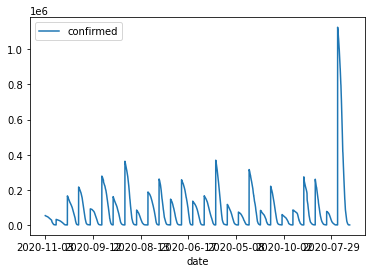

In [235]:
dados_estados.plot(x='date', y='confirmed')

In [236]:
lista_estados = ['dados_' + estado for estado in dados_estados.state.unique()]

In [237]:
dataframes_estados = {}
for i in lista_estados:
  for j in dados_estados.state.unique():
    dataframes_estados[i] = dados_estados.query('state == @j')

In [238]:
# dataframes_estados['dados_AC']

## Avaliando Maringá-Pr

In [239]:
dados_maringa = dados_PR = dados.query("city == 'Maringá'")

In [240]:
dados_maringa.isnull().sum()

date                              0
state                             0
city                              0
place_type                        0
confirmed                         0
deaths                            0
order_for_place                   0
is_last                           0
estimated_population_2019         0
estimated_population              0
city_ibge_code                    0
confirmed_per_100k_inhabitants    0
death_rate                        0
dtype: int64

In [241]:
dados_maringa_rv = dados_maringa.iloc[::-1]

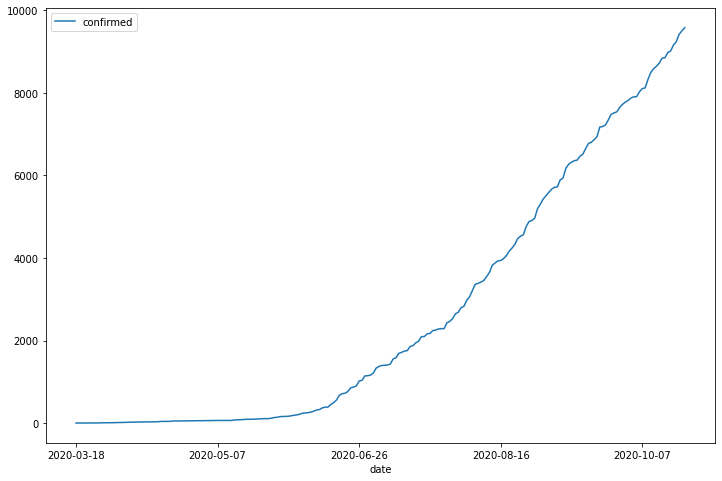

In [242]:
ax = dados_maringa_rv.plot(x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[21:40].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[41:60].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[61:80].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_maringa_rv.iloc[81:100].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));

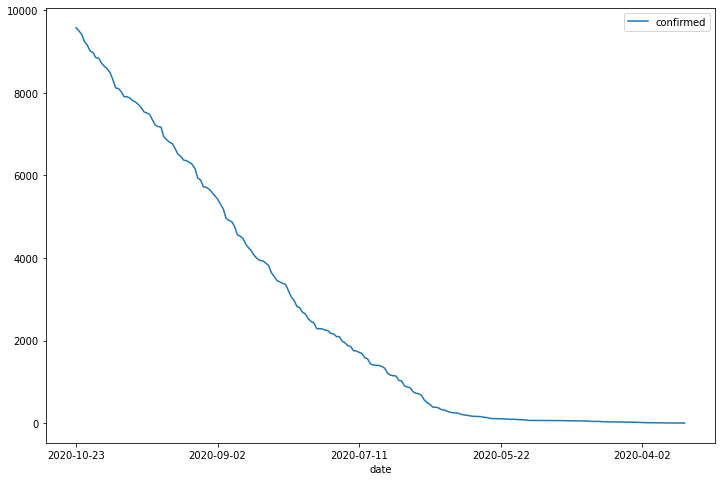

In [243]:
ax = dados_PR.plot(x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[21:40].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[41:60].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[61:80].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));
# dados_PR.iloc[81:100].plot(ax= ax, x='date', y='confirmed', figsize=(12,8));

In [244]:
dados_maringa_rv['new_cases'] = dados_maringa_rv['confirmed'].diff()

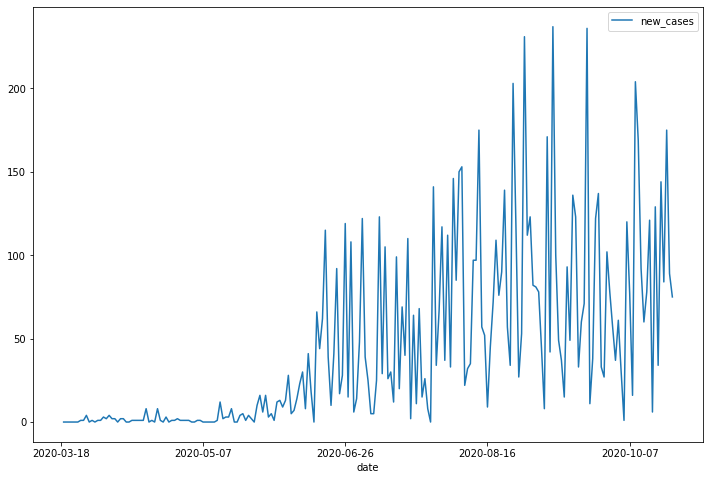

In [245]:
dados_maringa_rv.plot(x='date', y='new_cases', figsize=(12,8))

In [246]:
dados_maringa_rv.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths',
       'order_for_place', 'is_last', 'estimated_population_2019',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate', 'new_cases'],
      dtype='object')

Calculando a média móvel


In [247]:
dados_maringa_rv['pandas_SMA_7'] = dados_maringa_rv.iloc[:,-1].rolling(window=7).mean()


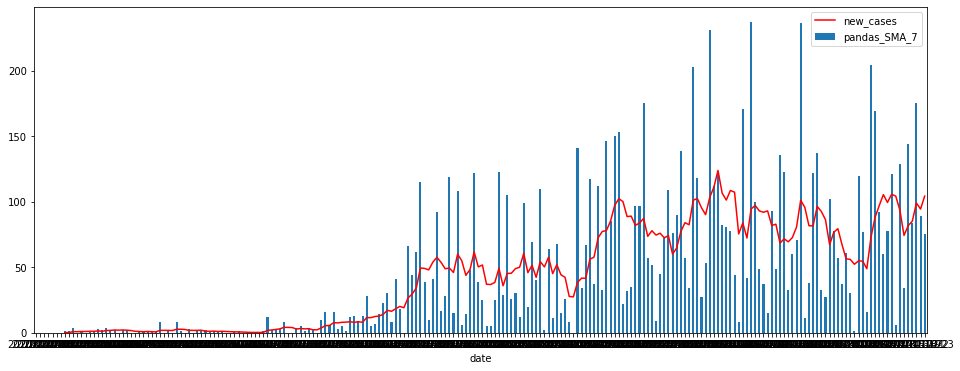

In [248]:
ax = dados_maringa_rv.plot(x='date', y='new_cases',  figsize=(12,8), kind = 'bar');
dados_maringa_rv.plot(ax = ax, x='date', y='pandas_SMA_7', figsize=(16,6), color='red', secondary_y=False)
